In [1]:
import funclib as flib

Increase in alpha by model, assuming Early muts and ratio of parental age effects

In [6]:
early = 5/3e9
m_slope_model, p_slope_model = flib.get_parental_age_effects(1.29e-8, 31.5, 27.5, early, 4)

Parameters from Gao et al. 2019

In [2]:
def get_dnms(intercept, slope, age):
    '''Return number of DNMs'''
    return intercept + slope*age

In [3]:
p_slope = 1.51
p_intercept = 6.05
m_slope = 0.37
m_intercept = 3.61

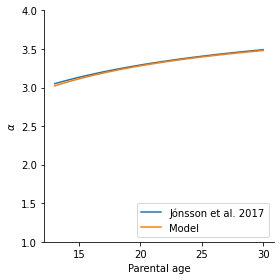

In [25]:
f,ax = plt.subplots(figsize=[4,4])

age_range = np.linspace(13,30,1000)

# Jonsson
p_dnms = [get_dnms(p_intercept, p_slope, age) for age in age_range]
m_dnms = [get_dnms(m_intercept, m_slope, age) for age in age_range]
ax.plot(age_range, [p/m for p,m in zip(p_dnms, m_dnms)], label="Jónsson et al. 2017")

# Model
early = 3/3e9
p_dnms = [get_dnms(early, p_slope_model, age) for age in age_range]
m_dnms = [get_dnms(early, m_slope_model, age) for age in age_range]
ax.plot(age_range, [p/m for p,m in zip(p_dnms, m_dnms)], label="Model")

# Style
ax.set_ylim([1,4])
ax.legend(loc=4)
ax.set_xlabel("Parental age")
ax.set_ylabel(r"$\alpha$")

plt.tight_layout()
sns.despine()
plt.savefig("../pdfs/alpha_increase_parental_ages_humans_ee3.pdf")